## Purpose: simple fit example

Artificial data.

Demonstration: 
    1. Linear Model
    2. Parameter fit
    3. Autoscaling, Chisq, Standard deviations
    4. Confidence region for the fit

Author: Do Kester


import classes

In [1]:
import numpy as numpy
import math

from BayesicFitting import PolynomialModel

from BayesicFitting import Fitter
from BayesicFitting import formatter as fmt
from BayesicFitting import plotFit
import matplotlib.pyplot as plt

define some constants

In [2]:
# define some constants
N = 201
b0 = 1.0            # offset of background
b1 = 0.2            # slope of background

sig = 0.2

make a 3-degree polynomial

In [3]:
x = numpy.linspace( -2.0, 5.0, N, dtype=float )
ym = b0 + b1 * x

numpy.random.seed( 1308 )
y = ym + sig * numpy.random.randn( N )


Define the model

In [4]:
mdl = PolynomialModel( 1 )
print( mdl )


Polynomial: f( x:p ) = p_0 + p_1 * x


define the fitter: Fitter

In [5]:
fitter = Fitter( x, mdl )
 
# find the parameters
param = fitter.fit( y )

  

In [6]:
print( "Parameters :", fmt( param, max=None ) )
print( "StDevs     :", fmt( fitter.stdevs, max=None ) )
print( "Chisq      :", fmt( fitter.chisq ) )
print( "Scale      :", fmt( fitter.scale ) )
print( "Evidence   :", fmt( fitter.getEvidence( limits=[-100,100] ) ) )
print( "Covar matrix :" )
print( fmt( fitter.covariance))

Parameters : [    0.990    0.196]
StDevs     : [    0.016    0.006]
Chisq      :     6.827
Scale      :     0.185
Evidence   :   -88.114
Covar matrix :
[[    0.000   -0.000]
 [   -0.000    0.000]]


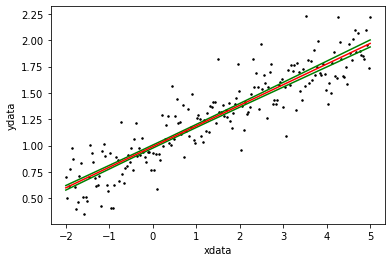

In [7]:
plotFit( x, y, model=mdl, fitter=fitter )